# SVM


In [1]:
#Dataset import
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision',15)
train_df = pd.read_csv("../../2_output/1_data/train.csv")
test_df = pd.read_csv("../../2_output/1_data/test.csv")

In [2]:
#train_df.dtypes

In [3]:
print(train_df.shape)
print(test_df.shape)

(3229, 54)
(1076, 54)


In [ ]:
X_train = train_df.iloc[:,2:]
y_train = train_df.iloc[:,0] 
del X_train['Retained_class']
X_train.head()

In [5]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Retained, dtype: int64

In [6]:
X_test = test_df.iloc[:,2:]
y_test = test_df.iloc[:,0] 
del X_test['Retained_class']
X_test.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,School_Type,Parent_Meeting_Flag,Income_Level,SPR_New_Existing,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Special_Pay,School_Sponsor,Group_main_region,departureMonth,departureSeason,returnMonth,returnSeason,earlyRPLFlag,initDayOfWeek,initSeason,LastMeetingSeason,LastMeetingWeekDay,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,other,air,East Coast,K,High,K->High,C,other,Southern California,10,CHD,1,O,1,Middle,Middle,Middle->Middle,S,other,0,west,Apr,Spring,May,Spring,notified,Thu,Spring,Summer,3,10.0,24,29,0.126429354314411,0.0,12.0,196.0,2.0,332.0,215.0,1.0,0.345745594930490,0.103221687115555,2167.0,0.991414625456030,0.766666666666667,0.829166666666667,62.0000000000000,3,-2,320.0
1,other,air,East Coast,PK,Middle,PK->Middle,C,other,Southern California,11,Private non-Christian,1,other,0,Middle,Middle,Middle->Middle,S,other,0,west,May,Spring,Jun,Spring,notified,Tue,Winter,Summer,2,8.0,24,25,0.142807017036153,-1.0,8.0,158.0,1.0,265.0,254.0,3.0,0.404058189011336,0.104028181313150,2148.0,0.915160915093646,1.000000000000000,0.533333333333333,44.6666666666667,3,4,213.0
2,other,air,East Coast,K,Middle,K->Middle,C,other,Pacific Northwest,1,CHD,1,K,1,Middle,Middle,Middle->Middle,S,other,1,west,Mar,Spring,Mar,Spring,no_notification,other,Summer,Summer,1,7.0,13,7,0.108985714542943,0.0,8.0,55.0,1.0,180.0,189.0,0.0,0.517738200915211,0.000000000000000,1989.0,0.866585225868707,1.000000000000000,1.000000000000000,23.0000000000000,3,1,139.0
3,other,air,East Coast,Middle,Middle,Middle->Middle,C,other,Southern California,5,CHD,1,Q,0,Middle,Middle,Middle->Middle,S,other,1,west,Jun,Summer,Jul,Summer,notified,Tue,Winter,Fall,7,7.0,30,69,0.246744805358034,7.0,8.0,214.0,1.0,280.0,281.0,9.0,0.721320367148791,0.381479340172846,2388.0,0.887128114124341,0.000000000000000,0.000000000000000,50.0000000000000,3,-12,399.0
4,other,air,East Coast,K,Middle,K->Middle,C,other,Southern California,5,PUBLIC,1,N,0,Middle,Middle,Middle->Middle,S,other,0,west,Apr,Spring,May,Spring,notified,Tue,Winter,Summer,4,10.0,24,26,0.113636130096558,0.0,8.0,217.0,2.0,372.0,250.0,7.0,0.492463386890341,0.168507536024800,2360.0,0.957976574874789,0.700000000000000,0.800000000000000,23.0000000000000,4,-4,207.0


In [7]:
y_test.head()

0    1
1    1
2    1
3    0
4    1
Name: Retained, dtype: int64

## Split categorical/continuous variables

In [8]:
# test_df.dtypes

In [9]:
df_categorical_train=X_train.select_dtypes(include=['object'])
df_categorical_train.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,School_Type,Income_Level,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Special_Pay,Group_main_region,departureMonth,departureSeason,returnMonth,returnSeason,earlyRPLFlag,initDayOfWeek,initSeason,LastMeetingSeason,LastMeetingWeekDay
0,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,9,CHD,O,Middle,Middle,Middle->Middle,S,other,west,Apr,Spring,May,Spring,notified,Wed,Spring,Summer,4
1,other,air,East Coast,K,Middle,K->Middle,C,other,other,other,other,other,other,other,other,other,other,west,Mar,Spring,Mar,Spring,no_notification,other,Summer,other,other
2,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,5,CHD,Q,Middle,Middle,Middle->Middle,L,CP,west,Mar,Winter,Apr,Spring,notified,Tue,Winter,Summer,3
3,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,5,CHD,Q,Middle,Middle,Middle->Middle,L,CP,west,Mar,Winter,Apr,Spring,notified,Tue,Winter,Summer,7
4,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,9,CHD,O,Middle,Middle,Middle->Middle,S,other,west,May,Spring,May,Spring,notified,Wed,Spring,Summer,6


In [10]:
df_categorical_test=X_test.select_dtypes(include=['object'])
df_categorical_test.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,School_Type,Income_Level,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Special_Pay,Group_main_region,departureMonth,departureSeason,returnMonth,returnSeason,earlyRPLFlag,initDayOfWeek,initSeason,LastMeetingSeason,LastMeetingWeekDay
0,other,air,East Coast,K,High,K->High,C,other,Southern California,10,CHD,O,Middle,Middle,Middle->Middle,S,other,west,Apr,Spring,May,Spring,notified,Thu,Spring,Summer,3
1,other,air,East Coast,PK,Middle,PK->Middle,C,other,Southern California,11,Private non-Christian,other,Middle,Middle,Middle->Middle,S,other,west,May,Spring,Jun,Spring,notified,Tue,Winter,Summer,2
2,other,air,East Coast,K,Middle,K->Middle,C,other,Pacific Northwest,1,CHD,K,Middle,Middle,Middle->Middle,S,other,west,Mar,Spring,Mar,Spring,no_notification,other,Summer,Summer,1
3,other,air,East Coast,Middle,Middle,Middle->Middle,C,other,Southern California,5,CHD,Q,Middle,Middle,Middle->Middle,S,other,west,Jun,Summer,Jul,Summer,notified,Tue,Winter,Fall,7
4,other,air,East Coast,K,Middle,K->Middle,C,other,Southern California,5,PUBLIC,N,Middle,Middle,Middle->Middle,S,other,west,Apr,Spring,May,Spring,notified,Tue,Winter,Summer,4


In [11]:
df_numerical_train=X_train.select_dtypes(include=['int64','float64'])
df_numerical_train.head()

,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,1,0,0,5.0,18,22,0.173405156631824,-1.00000000000000,8.00000000000000,102.00000000000000,1.00000000000000,238.000000000000000,244.000000000000000,3.00000000000000,0.570243822206344,0.119431395449224,2708.000000000000000,0.888166109478944,0.000000000000000,0.000000000000000,31.3333333333333,3,2,190.000000000000000
1,1,1,0,7.0,13,7,0.108985714542943,2.13731737900663,7.63971486323946,420.23059270373102,1.01240120470508,259.413772198435993,231.336912607420999,3.15200319568555,0.510360194400992,0.190361529691593,1250.605592208269854,1.000000000000000,0.000000000000000,0.000000000000000,0.0000000000000,0,1,199.424612735402974
2,1,1,1,9.0,33,71,0.071500079041017,-1.00000000000000,8.00000000000000,779.00000000000000,1.00000000000000,179.000000000000000,184.000000000000000,1.00000000000000,0.623850296451905,0.274595242745600,2518.000000000000000,0.929941313758624,0.966666666666667,0.400000000000000,34.3333333333333,3,-13,164.000000000000000
3,1,0,1,7.0,28,61,0.067303566941564,-1.00000000000000,8.00000000000000,849.00000000000000,1.00000000000000,184.000000000000000,196.000000000000000,1.00000000000000,0.592224236960405,0.262094537424580,2505.000000000000000,0.894531055221885,0.933333333333333,0.733333333333333,57.6666666666667,3,-1,162.000000000000000
4,1,1,0,9.0,11,24,0.165712332006676,-1.00000000000000,8.00000000000000,102.00000000000000,1.00000000000000,250.000000000000000,238.000000000000000,3.00000000000000,0.571136576912752,0.088140821730640,2569.000000000000000,0.850496570740333,0.000000000000000,0.200000000000000,54.3333333333333,3,-4,195.000000000000000


In [12]:
df_numerical_test=X_test.select_dtypes(include=['int64','float64'])
df_numerical_test.head()

,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,1,1,0,10.0,24,29,0.126429354314411,0.0,12.0,196.0,2.0,332.0,215.0,1.0,0.345745594930490,0.103221687115555,2167.0,0.991414625456030,0.766666666666667,0.829166666666667,62.0000000000000,3,-2,320.0
1,1,0,0,8.0,24,25,0.142807017036153,-1.0,8.0,158.0,1.0,265.0,254.0,3.0,0.404058189011336,0.104028181313150,2148.0,0.915160915093646,1.000000000000000,0.533333333333333,44.6666666666667,3,4,213.0
2,1,1,1,7.0,13,7,0.108985714542943,0.0,8.0,55.0,1.0,180.0,189.0,0.0,0.517738200915211,0.000000000000000,1989.0,0.866585225868707,1.000000000000000,1.000000000000000,23.0000000000000,3,1,139.0
3,1,0,1,7.0,30,69,0.246744805358034,7.0,8.0,214.0,1.0,280.0,281.0,9.0,0.721320367148791,0.381479340172846,2388.0,0.887128114124341,0.000000000000000,0.000000000000000,50.0000000000000,3,-12,399.0
4,1,0,0,10.0,24,26,0.113636130096558,0.0,8.0,217.0,2.0,372.0,250.0,7.0,0.492463386890341,0.168507536024800,2360.0,0.957976574874789,0.700000000000000,0.800000000000000,23.0000000000000,4,-4,207.0


In [13]:
print(df_numerical_train.shape)
print(df_numerical_test.shape)

(3229, 24)
(1076, 24)


## Categorical data

In [14]:
df_categorical_train.columns

Index(['Program_Code', 'Travel_Type', 'SPR_Product_Type', 'GroupGradeTypeLow',
       'GroupGradeTypeHigh', 'GroupGradeType', 'MajorProgramCode',
       'Poverty_Code', 'Region', 'CRM_Segment', 'School_Type', 'Income_Level',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
       'SchoolSizeIndicator', 'Special_Pay', 'Group_main_region',
       'departureMonth', 'departureSeason', 'returnMonth', 'returnSeason',
       'earlyRPLFlag', 'initDayOfWeek', 'initSeason', 'LastMeetingSeason',
       'LastMeetingWeekDay'],
      dtype='object')

In [15]:
dummies_train =pd.get_dummies(df_categorical_train,columns=df_categorical_train.columns)
dummies_train.tail()
#dummies_train.shape
#X_train.shape

,Program_Code_CD|HN,Program_Code_CN|HD,Program_Code_HC,Program_Code_HS,Program_Code_other,Travel_Type_air,Travel_Type_ground,SPR_Product_Type_CA History,SPR_Product_Type_East Coast,SPR_Product_Type_Science,SPR_Product_Type_other,GroupGradeTypeLow_Elementary,GroupGradeTypeLow_High,GroupGradeTypeLow_K,GroupGradeTypeLow_Middle,GroupGradeTypeLow_PK,GroupGradeTypeLow_other,GroupGradeTypeHigh_Elementary,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_other,GroupGradeType_Elementary->Elementary,GroupGradeType_Elementary->High,GroupGradeType_Elementary->Middle,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined,MajorProgramCode_C,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,Poverty_Code_A,Poverty_Code_B,Poverty_Code_C,Poverty_Code_D,Poverty_Code_other,Region_Dallas,Region_Houston,Region_Northern California,Region_Pacific Northwest,Region_Southern California,Region_other,CRM_Segment_1,CRM_Segment_10,CRM_Segment_11,CRM_Segment_2,CRM_Segment_4,CRM_Segment_5,CRM_Segment_6,CRM_Segment_7,CRM_Segment_8,CRM_Segment_9,CRM_Segment_other,School_Type_CHD,School_Type_Catholic,School_Type_PUBLIC,School_Type_Private non-Christian,School_Type_other,Income_Level_A,Income_Level_B,Income_Level_C,Income_Level_D,Income_Level_E,Income_Level_F,Income_Level_G,Income_Level_H,Income_Level_I,Income_Level_J,Income_Level_K,Income_Level_L,Income_Level_M,Income_Level_N,Income_Level_O,Income_Level_P,Income_Level_Q,Income_Level_other,SchoolGradeTypeLow_Elementary,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_other,SchoolGradeTypeHigh_Elementary,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_other,SchoolGradeType_Elementary->Elementary,SchoolGradeType_Elementary->High,SchoolGradeType_Elementary->Middle,SchoolGradeType_Elementary->Undefined,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Undefined->Undefined,SchoolGradeType_other,SchoolSizeIndicator_L,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M,SchoolSizeIndicator_other,Special_Pay_CP,Special_Pay_FR,Special_Pay_SA,Special_Pay_other,Group_main_region_midwest,Group_main_region_northeast,Group_main_region_other,Group_main_region_south,Group_main_region_west,departureMonth_Apr,departureMonth_Feb,departureMonth_Jan,departureMonth_Jul,departureMonth_Jun,departureMonth_Mar,departureMonth_May,departureSeason_Spring,departureSeason_Summer,departureSeason_Winter,returnMonth_Apr,returnMonth_Aug,returnMonth_Feb,returnMonth_Jan,returnMonth_Jul,returnMonth_Jun,returnMonth_Mar,returnMonth_May,returnSeason_Spring,returnSeason_Summer,returnSeason_Winter,earlyRPLFlag_no_notification,earlyRPLFlag_notified,initDayOfWeek_Fri,initDayOfWeek_Mon,initDayOfWeek_Sat,initDayOfWeek_Sun,initDayOfWeek_Thu,initDayOfWeek_Tue,initDayOfWeek_Wed,initDayOfWeek_other,initSeason_Fall,initSeason_Spring,initSeason_Summer,initSeason_Winter,initSeason_other,LastMeetingSeason_Fall,LastMeetingSeason_Spring,LastMeetingSeason_Summer,LastMeetingSeason_Winter,LastMeetingSeason_other,LastMeetingWeekDay_1,LastMeetingWeekDay_2,LastMeetingWeekDay_3,LastMeetingWeekDay_4,LastMeetingWeekDay_5,LastMeetingWeekDay_6,LastMeetingWeekDay_7,LastMeetingWeekDay_other
3224,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3225,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,

In [16]:
dummies_test =pd.get_dummies(df_categorical_test,columns=df_categorical_test.columns)
dummies_test.tail()
#dummies_test.shape
#X_train.shape

,Program_Code_CD|HN,Program_Code_CN|HD,Program_Code_HC,Program_Code_HS,Program_Code_other,Travel_Type_air,Travel_Type_ground,SPR_Product_Type_CA History,SPR_Product_Type_East Coast,SPR_Product_Type_Science,SPR_Product_Type_other,GroupGradeTypeLow_Elementary,GroupGradeTypeLow_High,GroupGradeTypeLow_K,GroupGradeTypeLow_Middle,GroupGradeTypeLow_PK,GroupGradeTypeLow_other,GroupGradeTypeHigh_Elementary,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_other,GroupGradeType_Elementary->Elementary,GroupGradeType_Elementary->High,GroupGradeType_Elementary->Middle,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined,MajorProgramCode_C,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,Poverty_Code_A,Poverty_Code_B,Poverty_Code_C,Poverty_Code_D,Poverty_Code_other,Region_Dallas,Region_Houston,Region_Northern California,Region_Pacific Northwest,Region_Southern California,Region_other,CRM_Segment_1,CRM_Segment_10,CRM_Segment_11,CRM_Segment_2,CRM_Segment_4,CRM_Segment_5,CRM_Segment_6,CRM_Segment_7,CRM_Segment_8,CRM_Segment_9,CRM_Segment_other,School_Type_CHD,School_Type_Catholic,School_Type_PUBLIC,School_Type_Private non-Christian,School_Type_other,Income_Level_A,Income_Level_B,Income_Level_C,Income_Level_D,Income_Level_E,Income_Level_F,Income_Level_G,Income_Level_H,Income_Level_I,Income_Level_J,Income_Level_K,Income_Level_L,Income_Level_M,Income_Level_N,Income_Level_O,Income_Level_P,Income_Level_Q,Income_Level_other,SchoolGradeTypeLow_Elementary,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_other,SchoolGradeTypeHigh_Elementary,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_other,SchoolGradeType_Elementary->Elementary,SchoolGradeType_Elementary->High,SchoolGradeType_Elementary->Middle,SchoolGradeType_Elementary->Undefined,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Undefined->Undefined,SchoolGradeType_other,SchoolSizeIndicator_L,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M,SchoolSizeIndicator_other,Special_Pay_CP,Special_Pay_FR,Special_Pay_SA,Special_Pay_other,Group_main_region_midwest,Group_main_region_northeast,Group_main_region_other,Group_main_region_south,Group_main_region_west,departureMonth_Apr,departureMonth_Feb,departureMonth_Jan,departureMonth_Jun,departureMonth_Mar,departureMonth_May,departureSeason_Spring,departureSeason_Summer,departureSeason_Winter,returnMonth_Apr,returnMonth_Aug,returnMonth_Feb,returnMonth_Jan,returnMonth_Jul,returnMonth_Jun,returnMonth_Mar,returnMonth_May,returnSeason_Spring,returnSeason_Summer,returnSeason_Winter,earlyRPLFlag_no_notification,earlyRPLFlag_notified,initDayOfWeek_Fri,initDayOfWeek_Mon,initDayOfWeek_Sat,initDayOfWeek_Sun,initDayOfWeek_Thu,initDayOfWeek_Tue,initDayOfWeek_Wed,initDayOfWeek_other,initSeason_Fall,initSeason_Spring,initSeason_Summer,initSeason_Winter,initSeason_other,LastMeetingSeason_Fall,LastMeetingSeason_Spring,LastMeetingSeason_Summer,LastMeetingSeason_Winter,LastMeetingSeason_other,LastMeetingWeekDay_1,LastMeetingWeekDay_2,LastMeetingWeekDay_3,LastMeetingWeekDay_4,LastMeetingWeekDay_5,LastMeetingWeekDay_6,LastMeetingWeekDay_7,LastMeetingWeekDay_other
1071,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1072,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1

In [17]:
print(df_categorical_train.shape)
print(dummies_train.shape)
print(df_categorical_test.shape)
print(dummies_test.shape)

(3229, 27)
(3229, 164)
(1076, 27)
(1076, 163)


In [18]:
df_categorical_test.sample(10)

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,School_Type,Income_Level,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Special_Pay,Group_main_region,departureMonth,departureSeason,returnMonth,returnSeason,earlyRPLFlag,initDayOfWeek,initSeason,LastMeetingSeason,LastMeetingWeekDay
140,HC,air,East Coast,Middle,Middle,Middle->Middle,H,B,Northern California,5,PUBLIC,Q,Middle,Middle,Middle->Middle,L,FR,west,Apr,Spring,Apr,Spring,notified,Wed,Spring,Summer,5
533,CN|HD,air,East Coast,Elementary,Middle,Elementary->Middle,H,C,other,11,PUBLIC,F,Middle,Middle,Middle->Middle,S,other,midwest,Jun,Spring,Jun,Spring,notified,Wed,Spring,Fall,7
515,CN|HD,air,East Coast,Middle,Middle,Middle->Middle,H,B,Pacific Northwest,5,PUBLIC,F,Middle,Middle,Middle->Middle,S-M,other,west,Jun,Summer,Jul,Summer,no_notification,other,Fall,Fall,6
422,CN|HD,air,East Coast,PK,Middle,PK->Middle,H,other,Southern California,5,Private non-Christian,other,Middle,Middle,Middle->Middle,S,FR,west,May,Spring,May,Spring,notified,Tue,Winter,other,other
623,CN|HD,air,East Coast,Middle,Middle,Middle->Middle,H,B,Pacific Northwest,5,PUBLIC,M,Middle,Middle,Middle->Middle,M-L,other,west,Apr,Spring,Apr,Spring,notified,Thu,Spring,Fall,4
437,CN|HD,air,East Coast,K,Middle,K->Middle,H,other,Northern California,1,Catholic,J,Middle,Middle,Middle->Middle,S,other,west,Apr,Spring,Apr,Spring,notified,Wed,Spring,Summer,6
584,CN|HD,air,East Coast,Middle,Middle,Middle->Middle,H,C,Dallas,10,PUBLIC,J,Middle,Middle,Middle->Middle,L,FR,south,Jun,Summer,Jun,Summer,notified,Wed,Winter,Fall,1
0,other,air,East Coast,K,High,K->High,C,other,Southern California,10,CHD,O,Middle,Middle,Middle->Middle,S,other,west,Apr,Spring,May,Spring,notified,Thu,Spring,Summer,3
568,CN|HD,air,East Coast,Middle,Middle,Middle->Middle,H,C,Southern California,10,PUBLIC,M,Middle,Middle,Middle->Middle,L,FR,west,Mar,Spring,Apr,Spring,notified,Mon,Winter,Summer,6
668,CN|HD,air,East Coast,K,Middle,K->Middle,H,B,Pacific Northwest,5,PUBLIC,K,Middle,Middle,Middle->Middle,M-L,other,west,Apr,Spring,Apr,Spring,notified,Thu,Spring,Fall,6


In [19]:
#df_categorical_train.shape
df_categorical_train.sample(10)

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,School_Type,Income_Level,SchoolGradeTypeLow,SchoolGradeTypeHigh,SchoolGradeType,SchoolSizeIndicator,Special_Pay,Group_main_region,departureMonth,departureSeason,returnMonth,returnSeason,earlyRPLFlag,initDayOfWeek,initSeason,LastMeetingSeason,LastMeetingWeekDay
2474,other,air,CA History,K,Middle,K->Middle,H,other,Southern California,4,Private non-Christian,M,Elementary,Elementary,Elementary->Elementary,S,CP,west,Apr,Spring,May,Spring,no_notification,Fri,Spring,other,other
69,CD|HN,ground,East Coast,PK,Middle,PK->Middle,C,other,other,10,CHD,L,Middle,Middle,Middle->Middle,S,other,midwest,Jun,Spring,Jun,Summer,notified,Wed,Spring,Summer,3
3047,other,air,Science,Middle,Middle,Middle->Middle,S,D,other,6,PUBLIC,C,Middle,Middle,Middle->Middle,S,other,west,Jun,Spring,Jun,Summer,no_notification,Sun,Summer,other,other
3098,other,air,Science,other,other,Undefined->Undefined,S,other,Pacific Northwest,6,CHD,other,Middle,Middle,Middle->Middle,other,other,west,Jun,Summer,Jul,Summer,notified,Mon,Winter,Fall,3
1871,CN|HD,ground,East Coast,Middle,Middle,Middle->Middle,H,A,other,5,PUBLIC,Q,Middle,Middle,Middle->Middle,M-L,other,midwest,Feb,Winter,Mar,Winter,notified,Wed,Spring,Fall,1
2465,other,air,CA History,PK,Middle,PK->Middle,H,other,Southern California,5,Private non-Christian,M,Elementary,Elementary,Elementary->Elementary,S,other,west,May,Spring,May,Spring,no_notification,Fri,Spring,other,other
2779,HS,air,CA History,PK,Middle,PK->Middle,H,other,Southern California,4,CHD,N,Elementary,Elementary,Elementary->Elementary,S,SA,west,Apr,Spring,May,Spring,notified,Fri,Spring,Summer,6
3159,other,air,Science,Middle,Middle,Middle->Middle,S,C,Pacific Northwest,7,PUBLIC,F,Middle,Middle,Middle->Middle,S,other,west,Jun,Summer,Jul,Summer,notified,Thu,Spring,Fall,5
379,HC,air,East Coast,K,Middle,K->Middle,H,B,Northern California,5,PUBLIC,Q,Middle,Middle,Middle->Middle,L,other,west,Mar,Spring,Apr,Spring,notified,Mon,Winter,Summer,7
38,CD|HN,air,East Coast,PK,High,PK->High,C,other,Pacific Northwest,5,CHD,I,Middle,Middle,Middle->Middle,M-L,CP,west,Apr,Spring,May,Spring,no_notification,other,Fall,Fall,7


## Numerical data

array([[<AxesSubplot:title={'center':'Parent_Meeting_Flag'}>,
        <AxesSubplot:title={'center':'SPR_New_Existing'}>,
        <AxesSubplot:title={'center':'School_Sponsor'}>,
        <AxesSubplot:title={'center':'From_Grade'}>,
        <AxesSubplot:title={'center':'Days'}>],
       [<AxesSubplot:title={'center':'Total_Pax'}>,
        <AxesSubplot:title={'center':'FPP_to_School_enrollment'}>,
        <AxesSubplot:title={'center':'MDR_Low_Grade'}>,
        <AxesSubplot:title={'center':'MDR_High_Grade'}>,
        <AxesSubplot:title={'center':'Total_School_Enrollment'}>],
       [<AxesSubplot:title={'center':'NumberOfMeetingswithParents'}>,
        <AxesSubplot:title={'center':'DifferenceTraveltoFirstMeeting'}>,
        <AxesSubplot:title={'center':'DifferenceTraveltoLastMeeting'}>,
        <AxesSubplot:title={'center':'FRP_Cancelled'}>,
        <AxesSubplot:title={'center':'FRP_Take_up_percent_'}>],
       [<AxesSubplot:title={'center':'EZ_Pay_Take_Up_Rate'}>,
        <AxesSubplot:titl

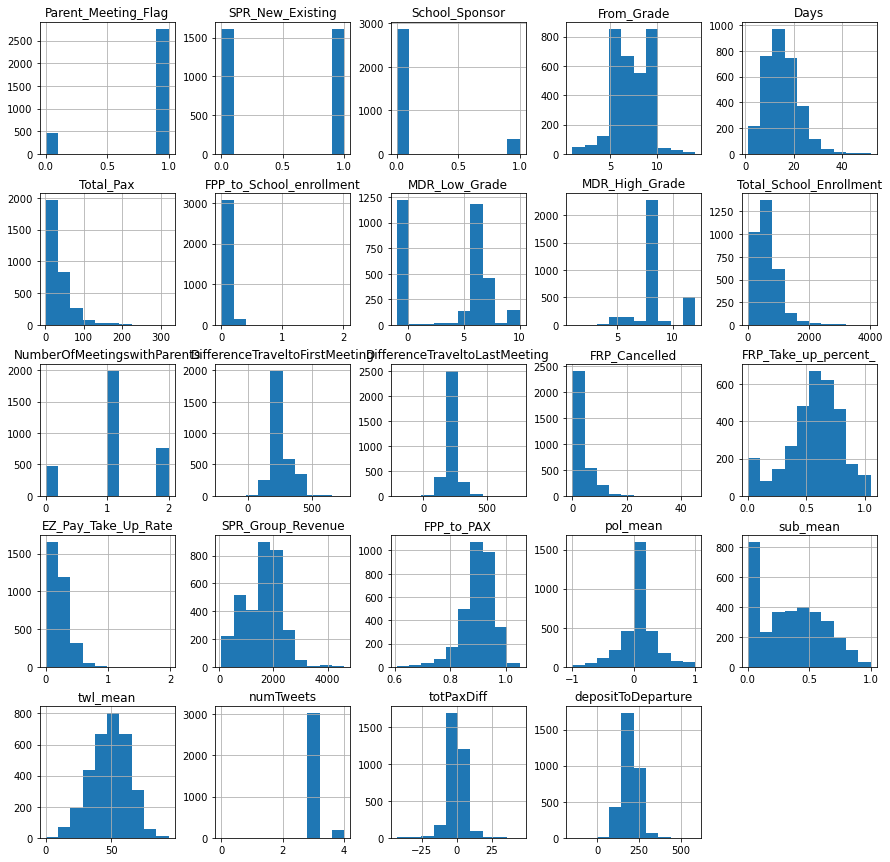

In [50]:
df_numerical_train.hist(figsize=(15,15))

In [21]:
# sns.pairplot(df_numerical_train[['Retained', 'Parent_Meeting_Flag', 'SPR_New_Existing', 'School_Sponsor',
#         'From_Grade', 'Days', 'Total_Pax', 'FPP_to_School_enrollment',
#        'MDR_Low_Grade', 'MDR_High_Grade', 'Total_School_Enrollment',
#        'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
#        'DifferenceTraveltoLastMeeting', 'FRP_Cancelled',
#        'FRP_Take_up_percent_', 'EZ_Pay_Take_Up_Rate', 'SPR_Group_Revenue',
#        'FPP_to_PAX', 'pol_mean', 'sub_mean', 'twl_mean', 'numTweets',
#        'totPaxDiff', 'depositToDeparture']], hue='Retained')

## Standarize

In [22]:
df_numerical_train.tail()

,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
3224,1,0,0,7.0,18,11,0.014665665548888,7.0,9.0,644.0,1.0,191.0,187.0,2.0,0.661466851537078,0.100751212241188,1970.0,0.910949970533674,-1.000000000000000,1.000000000000000,60.6666666666667,3,2,159.0
3225,1,0,0,6.0,13,17,0.017764275304780,5.0,6.0,908.0,1.0,188.0,191.0,2.0,0.608024884991947,0.123102826630101,1873.0,0.944781698849715,0.266666666666667,0.300000000000000,41.3333333333333,3,-3,113.0
3226,1,0,0,8.0,20,6,0.006920828413484,6.0,8.0,553.0,1.0,201.0,208.0,2.0,1.038280762495430,0.000000000000000,1857.0,0.672193466643264,-0.933333333333333,1.000000000000000,49.0000000000000,3,0,167.0
3227,1,0,0,7.0,10,12,0.009419789252674,6.0,8.0,1257.0,1.0,254.0,269.0,0.0,0.622484596439137,0.245419064973399,1790.0,0.887549533053712,0.000000000000000,0.200000000000000,35.3333333333333,3,0,223.0
3228,1,0,0,10.0,15,4,0.008308224105284,0.0,12.0,363.0,2.0,366.0,267.0,1.0,1.033587464334580,0.000000000000000,1548.0,0.773341717132899,-0.804761904761905,0.841269841269841,54.6666666666667,3,0,256.0


In [23]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler().fit(df_numerical_train)
scaled_df_train = pd.DataFrame(scaler_train.transform(df_numerical_train))
scaled_df_train.columns = df_numerical_train.columns

scaled_df_train.head()

,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,0.411193843021439,-1.000309741373387,-0.349785176636926,-1.188236076749621,0.413948648212629,-0.405257005752271,1.316858413879650,-1.392765987242568,-0.224008449531597,-1.214154246782799,-0.152846461331880,-0.248904528084698,0.339865368607812,-0.100862984405031,0.013401203461155,-0.561365653543493,1.666322118963660,-0.232088586093581,-0.207869673259541,-1.297590125320305,-1.234349124893282,-0.210760480678625,0.373008222415827,-0.108383814609019
1,0.411193843021439,0.999690354536624,-0.349785176636926,-0.150033063084262,-0.340362968648872,-0.843728682328495,0.504913739254877,-0.474224057051257,-0.428943123481352,-0.471838526042721,-0.132563216926133,0.030653476370431,0.091887684175396,-0.060880095030073,-0.244006801203340,-0.121039147605533,-0.512005544006789,1.762066580012715,-0.207869673259541,-1.297590125320305,-3.429906537696642,-11.877256345443383,0.201654751057070,0.082691626768352
2,0.411193843021439,0.999690354536624,2.858897594273963,0.888169950581098,2.676883498797131,1.027083804396728,0.032443610148193,-1.392765987242568,-0.224008449531597,0.365039440006763,-0.152846461331880,-1.019152857524630,-0.835097782532122,-0.626942573648284,0.243827049027835,0.401874518742729,1.382334302246628,0.512821915019540,3.194690148687372,0.199647078211698,-1.024136181114237,-0.210760480678625,-2.197293847965535,-0.635510139614374
3,0.411193843021439,-1.000309741373387,2.858897594273963,-0.150033063084262,1.922571881935631,0.734769353345912,-0.020449360369125,-1.392765987242568,-0.224008449531597,0.528323868478357,-0.152846461331880,-0.953877575368704,-0.600105152304135,-0.626942573648284,0.107883366798548,0.324271509040868,1.362903556892304,-0.118592673753107,3.077360499654717,1.447344747821698,0.610853381611676,-0.210760480678625,-0.141052191660445,-0.676058318460940
4,0.411193843021439,0.999690354536624,-0.349785176636926,0.888169950581098,-0.642087615393472,-0.346794115542108,1.219897810299859,-1.392765987242568,-0.224008449531597,-1.214154246782799,-0.152846461331880,-0.092243850910474,0.222369053493819,-0.100862984405031,0.017238683187306,-0.755614108610819,1.458562610944357,-0.903789310538103,-0.207869673259541,-0.548971523554304,0.377283444079399,-0.210760480678625,-0.655112605736718,-0.007013367492604


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_numerical_train) 

X_scaled_test = scaler.transform(df_numerical_test)
X_scaled_test = pd.DataFrame(X_scaled_test,columns=df_numerical_test.columns)
X_scaled_test.head()

,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,0.411193843021439,0.999690354536624,-0.349785176636926,1.407271457413778,1.319122588446430,-0.200636890016700,0.724773923684524,-1.099986577566729,2.051241379449971,-0.994886585692372,1.482740152074973,0.978270776446721,-0.228033487776489,-0.626942573648284,-0.951597792952842,-0.661993747781250,0.857704177679900,1.608977306984235,2.490712254491459,1.806057827834576,0.914494300403629,-0.210760480678625,-0.312405663019203,2.527247810417758
1,0.411193843021439,-1.000309741373387,-0.349785176636926,0.369068443748418,1.319122588446430,-0.317562670437026,0.931198499845427,-1.392765987242568,-0.224008449531597,-1.083526704005523,-0.152846461331880,0.103581995557306,0.535692560464468,-0.100862984405031,-0.700942830331827,-0.656987120120392,0.829305396008197,0.249266670562341,3.312019797720023,0.698726146055696,-0.300069374764187,-0.210760480678625,0.715715165133342,0.357920242126488
2,0.411193843021439,0.999690354536624,2.858897594273963,-0.150033063084262,-0.340362968648872,-0.843728682328495,0.504913739254877,-1.099986577566729,-0.224008449531597,-1.323788077328012,-0.152846461331880,-1.006097801093445,-0.737184186603794,-0.889982368269910,-0.212292658209201,-1.302782677762776,0.591652433597628,-0.616906017911267,3.312019797720023,2.445502883509701,-1.818273968723961,-0.210760480678625,0.201654751057070,-1.142362375196446
3,0.411193843021439,-1.000309741373387,2.858897594273963,-0.150033063084262,2.224296528680231,0.968620914186565,2.241233653577291,0.949469290164141,-0.224008449531597,-0.952899161228248,-0.152846461331880,0.299407842025085,1.064425978477438,1.477375783324729,0.662799267847724,1.065399290874892,1.188026848703395,-0.250597499528783,-0.207869673259541,-1.297590125320305,0.073642525287447,-0.210760480678625,-2.025940376606778,4.128900874857107
4,0.411193843021439,-1.000309741373387,-0.349785176636926,1.407271457413778,1.319122588446430,-0.288331225331945,0.563527723187558,-1.099986577566729,-0.224008449531597,-0.945901257150894,1.482740152074973,1.500473033694133,0.457361683721806,0.951296194081475,-0.320935699468410,-0.256706347095213,1.146176012555622,1.012729952980658,2.256052956426153,1.696884281743700,-1.818273968723961,3.678071474242961,-0.655112605736718,0.236275705586791


In [25]:
scaler_test = StandardScaler().fit(df_numerical_test)
scaled_df_test = pd.DataFrame(scaler_test.transform(df_numerical_test))
scaled_df_test.columns = df_numerical_test.columns
scaled_df_test.head()

,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,0.405588664168717,0.963491262122486,-0.352628582860729,1.351625060992606,1.390487011585685,-0.188877731327017,0.625097241433540,-1.201489780845046,2.175627375440083,-1.080521424643410,1.438011985637792,1.023891832785873,-0.156924098532059,-0.645651277761947,-0.944523362032652,-0.645603387622684,0.947658844235739,1.685163631495616,2.462495128507632,1.823216192904103,0.929392494761375,-0.256902268446429,-0.353535805988343,2.774744610105567
1,0.405588664168717,-1.037892131784454,-0.352628582860729,0.320028886084416,1.390487011585685,-0.320016585276279,0.807013082615267,-1.502415280355730,-0.230112669742614,-1.177403643297495,-0.180785805546294,0.123534102612692,0.634389809829643,-0.075034766533422,-0.688810519273823,-0.640432235290872,0.917726780257844,0.288343760420191,3.291331570235789,0.702474446774576,-0.310270155827172,-0.256902268446429,0.765301038845355,0.457703577851226
2,0.405588664168717,0.963491262122486,2.835844989896783,-0.195769201369679,-0.296281899875642,-0.910141428047961,0.431340998176377,-1.201489780845046,-0.230112669742614,-1.440005446491463,-0.180785805546294,-1.018710778950300,-0.684466704106526,-0.930959533376209,-0.190300043672363,-1.307449523171875,0.667242665916514,-0.601468520688826,3.291331570235789,2.470405088556362,-1.859848469062861,-0.256902268446429,0.205882616428506,-1.144736014548972
3,0.405588664168717,-1.037892131784454,2.835844989896783,-0.195769201369679,2.310542781473682,1.122510808165610,1.961508111264387,0.904988715729746,-0.230112669742614,-1.034629847386212,-0.180785805546294,0.325106728770867,1.182222515618513,1.636814767152152,0.702450060883335,1.138554162106061,1.295816009452306,-0.225162706999442,-0.260824608599174,-1.318017715261747,0.071164505892379,-0.256902268446429,-2.218263880711174,4.485457147938210
4,0.405588664168717,-1.037892131784454,-0.352628582860729,1.351625060992606,1.390487011585685,-0.287231871788964,0.482995759399258,-1.201489780845046,-0.230112669742614,-1.026981251176679,1.438011985637792,1.561418835874340,0.553229408972032,1.066198255923627,-0.301135355432626,-0.226997685525796,1.251705599379618,1.072643489460100,2.225684716585300,1.712720527792740,-1.859848469062861,3.333056703610174,-0.726481420932910,0.327776043332291


<AxesSubplot:>

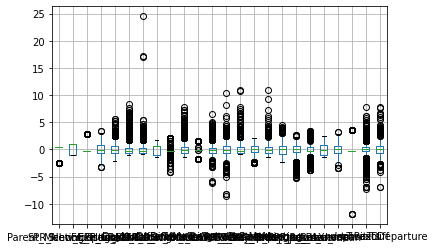

In [26]:
scaled_df_train.boxplot()

In [27]:
scaled_df_train.columns

Index(['Parent_Meeting_Flag', 'SPR_New_Existing', 'School_Sponsor',
       'From_Grade', 'Days', 'Total_Pax', 'FPP_to_School_enrollment',
       'MDR_Low_Grade', 'MDR_High_Grade', 'Total_School_Enrollment',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FRP_Cancelled',
       'FRP_Take_up_percent_', 'EZ_Pay_Take_Up_Rate', 'SPR_Group_Revenue',
       'FPP_to_PAX', 'pol_mean', 'sub_mean', 'twl_mean', 'numTweets',
       'totPaxDiff', 'depositToDeparture'],
      dtype='object')

In [28]:
x_numerical_train=scaled_df_train[['Parent_Meeting_Flag', 'SPR_New_Existing', 'School_Sponsor',
       'From_Grade', 'Days', 'Total_Pax', 'FPP_to_School_enrollment',
       'MDR_Low_Grade', 'MDR_High_Grade', 'Total_School_Enrollment',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FRP_Cancelled',
       'FRP_Take_up_percent_', 'EZ_Pay_Take_Up_Rate', 'SPR_Group_Revenue',
       'FPP_to_PAX', 'pol_mean', 'sub_mean', 'twl_mean', 'numTweets',
       'totPaxDiff', 'depositToDeparture']]

In [52]:
x_numerical_train.shape

(3229, 24)

In [51]:
scaled_df_train.shape

(3229, 24)

In [30]:
scaled_df_train.shape

(3229, 24)

In [31]:
scaled_df_test.columns

Index(['Parent_Meeting_Flag', 'SPR_New_Existing', 'School_Sponsor',
       'From_Grade', 'Days', 'Total_Pax', 'FPP_to_School_enrollment',
       'MDR_Low_Grade', 'MDR_High_Grade', 'Total_School_Enrollment',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FRP_Cancelled',
       'FRP_Take_up_percent_', 'EZ_Pay_Take_Up_Rate', 'SPR_Group_Revenue',
       'FPP_to_PAX', 'pol_mean', 'sub_mean', 'twl_mean', 'numTweets',
       'totPaxDiff', 'depositToDeparture'],
      dtype='object')

In [32]:
x_numerical_test=scaled_df_test[['Parent_Meeting_Flag', 'SPR_New_Existing', 'School_Sponsor',
       'From_Grade', 'Days', 'Total_Pax', 'FPP_to_School_enrollment',
       'MDR_Low_Grade', 'MDR_High_Grade', 'Total_School_Enrollment',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'FRP_Cancelled',
       'FRP_Take_up_percent_', 'EZ_Pay_Take_Up_Rate', 'SPR_Group_Revenue',
       'FPP_to_PAX', 'pol_mean', 'sub_mean', 'twl_mean', 'numTweets',
       'totPaxDiff', 'depositToDeparture']]

In [33]:
x_numerical_test.shape

(1076, 24)

In [34]:
scaled_df_test.shape

(1076, 24)

In [36]:
print(dummies_train.shape)
print(x_numerical_train.shape)
print(dummies_test.shape)
print(x_numerical_test.shape)

(3229, 164)
(3229, 24)
(1076, 163)
(1076, 24)


In [37]:
X_train=pd.concat([dummies_train,x_numerical_train], axis = 1)
X_train.tail()
X_train.shape

(3229, 188)

In [38]:
X_test=pd.concat([dummies_test,x_numerical_test], axis = 1)
X_test.tail()
X_test.shape

(1076, 187)

## Add missing columns

In [40]:
X_train.head()

,Program_Code_CD|HN,Program_Code_CN|HD,Program_Code_HC,Program_Code_HS,Program_Code_other,Travel_Type_air,Travel_Type_ground,SPR_Product_Type_CA History,SPR_Product_Type_East Coast,SPR_Product_Type_Science,SPR_Product_Type_other,GroupGradeTypeLow_Elementary,GroupGradeTypeLow_High,GroupGradeTypeLow_K,GroupGradeTypeLow_Middle,GroupGradeTypeLow_PK,GroupGradeTypeLow_other,GroupGradeTypeHigh_Elementary,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_other,GroupGradeType_Elementary->Elementary,GroupGradeType_Elementary->High,GroupGradeType_Elementary->Middle,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined,MajorProgramCode_C,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,Poverty_Code_A,Poverty_Code_B,Poverty_Code_C,Poverty_Code_D,Poverty_Code_other,Region_Dallas,Region_Houston,Region_Northern California,Region_Pacific Northwest,Region_Southern California,Region_other,CRM_Segment_1,CRM_Segment_10,CRM_Segment_11,CRM_Segment_2,CRM_Segment_4,CRM_Segment_5,CRM_Segment_6,CRM_Segment_7,CRM_Segment_8,CRM_Segment_9,CRM_Segment_other,School_Type_CHD,School_Type_Catholic,School_Type_PUBLIC,School_Type_Private non-Christian,School_Type_other,Income_Level_A,Income_Level_B,Income_Level_C,Income_Level_D,Income_Level_E,Income_Level_F,Income_Level_G,Income_Level_H,Income_Level_I,Income_Level_J,Income_Level_K,Income_Level_L,Income_Level_M,Income_Level_N,Income_Level_O,Income_Level_P,Income_Level_Q,Income_Level_other,SchoolGradeTypeLow_Elementary,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_other,SchoolGradeTypeHigh_Elementary,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_other,SchoolGradeType_Elementary->Elementary,SchoolGradeType_Elementary->High,SchoolGradeType_Elementary->Middle,SchoolGradeType_Elementary->Undefined,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Undefined->Undefined,SchoolGradeType_other,SchoolSizeIndicator_L,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M,SchoolSizeIndicator_other,Special_Pay_CP,Special_Pay_FR,Special_Pay_SA,Special_Pay_other,Group_main_region_midwest,Group_main_region_northeast,Group_main_region_other,Group_main_region_south,Group_main_region_west,departureMonth_Apr,departureMonth_Feb,departureMonth_Jan,departureMonth_Jul,departureMonth_Jun,departureMonth_Mar,departureMonth_May,departureSeason_Spring,departureSeason_Summer,departureSeason_Winter,returnMonth_Apr,returnMonth_Aug,returnMonth_Feb,returnMonth_Jan,returnMonth_Jul,returnMonth_Jun,returnMonth_Mar,returnMonth_May,returnSeason_Spring,returnSeason_Summer,returnSeason_Winter,earlyRPLFlag_no_notification,earlyRPLFlag_notified,initDayOfWeek_Fri,initDayOfWeek_Mon,initDayOfWeek_Sat,initDayOfWeek_Sun,initDayOfWeek_Thu,initDayOfWeek_Tue,initDayOfWeek_Wed,initDayOfWeek_other,initSeason_Fall,initSeason_Spring,initSeason_Summer,initSeason_Winter,initSeason_other,LastMeetingSeason_Fall,LastMeetingSeason_Spring,LastMeetingSeason_Summer,LastMeetingSeason_Winter,LastMeetingSeason_other,LastMeetingWeekDay_1,LastMeetingWeekDay_2,LastMeetingWeekDay_3,LastMeetingWeekDay_4,LastMeetingWeekDay_5,LastMeetingWeekDay_6,LastMeetingWeekDay_7,LastMeetingWeekDay_other,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [41]:
X_test.head()

,Program_Code_CD|HN,Program_Code_CN|HD,Program_Code_HC,Program_Code_HS,Program_Code_other,Travel_Type_air,Travel_Type_ground,SPR_Product_Type_CA History,SPR_Product_Type_East Coast,SPR_Product_Type_Science,SPR_Product_Type_other,GroupGradeTypeLow_Elementary,GroupGradeTypeLow_High,GroupGradeTypeLow_K,GroupGradeTypeLow_Middle,GroupGradeTypeLow_PK,GroupGradeTypeLow_other,GroupGradeTypeHigh_Elementary,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_other,GroupGradeType_Elementary->Elementary,GroupGradeType_Elementary->High,GroupGradeType_Elementary->Middle,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined,MajorProgramCode_C,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,Poverty_Code_A,Poverty_Code_B,Poverty_Code_C,Poverty_Code_D,Poverty_Code_other,Region_Dallas,Region_Houston,Region_Northern California,Region_Pacific Northwest,Region_Southern California,Region_other,CRM_Segment_1,CRM_Segment_10,CRM_Segment_11,CRM_Segment_2,CRM_Segment_4,CRM_Segment_5,CRM_Segment_6,CRM_Segment_7,CRM_Segment_8,CRM_Segment_9,CRM_Segment_other,School_Type_CHD,School_Type_Catholic,School_Type_PUBLIC,School_Type_Private non-Christian,School_Type_other,Income_Level_A,Income_Level_B,Income_Level_C,Income_Level_D,Income_Level_E,Income_Level_F,Income_Level_G,Income_Level_H,Income_Level_I,Income_Level_J,Income_Level_K,Income_Level_L,Income_Level_M,Income_Level_N,Income_Level_O,Income_Level_P,Income_Level_Q,Income_Level_other,SchoolGradeTypeLow_Elementary,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_other,SchoolGradeTypeHigh_Elementary,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_other,SchoolGradeType_Elementary->Elementary,SchoolGradeType_Elementary->High,SchoolGradeType_Elementary->Middle,SchoolGradeType_Elementary->Undefined,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Undefined->Undefined,SchoolGradeType_other,SchoolSizeIndicator_L,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M,SchoolSizeIndicator_other,Special_Pay_CP,Special_Pay_FR,Special_Pay_SA,Special_Pay_other,Group_main_region_midwest,Group_main_region_northeast,Group_main_region_other,Group_main_region_south,Group_main_region_west,departureMonth_Apr,departureMonth_Feb,departureMonth_Jan,departureMonth_Jun,departureMonth_Mar,departureMonth_May,departureSeason_Spring,departureSeason_Summer,departureSeason_Winter,returnMonth_Apr,returnMonth_Aug,returnMonth_Feb,returnMonth_Jan,returnMonth_Jul,returnMonth_Jun,returnMonth_Mar,returnMonth_May,returnSeason_Spring,returnSeason_Summer,returnSeason_Winter,earlyRPLFlag_no_notification,earlyRPLFlag_notified,initDayOfWeek_Fri,initDayOfWeek_Mon,initDayOfWeek_Sat,initDayOfWeek_Sun,initDayOfWeek_Thu,initDayOfWeek_Tue,initDayOfWeek_Wed,initDayOfWeek_other,initSeason_Fall,initSeason_Spring,initSeason_Summer,initSeason_Winter,initSeason_other,LastMeetingSeason_Fall,LastMeetingSeason_Spring,LastMeetingSeason_Summer,LastMeetingSeason_Winter,LastMeetingSeason_other,LastMeetingWeekDay_1,LastMeetingWeekDay_2,LastMeetingWeekDay_3,LastMeetingWeekDay_4,LastMeetingWeekDay_5,LastMeetingWeekDay_6,LastMeetingWeekDay_7,LastMeetingWeekDay_other,Parent_Meeting_Flag,SPR_New_Existing,School_Sponsor,From_Grade,Days,Total_Pax,FPP_to_School_enrollment,MDR_Low_Grade,MDR_High_Grade,Total_School_Enrollment,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FRP_Cancelled,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [42]:
print(X_train.shape)
print(X_test.shape)

(3229, 188)
(1076, 187)


In [43]:
missing_cols = set( X_train.columns ) - set( X_test.columns )
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]
print(X_train.shape)
print(X_test.shape)

(3229, 188)
(1076, 188)


## Models

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [45]:
print(X_train.shape, X_test.shape)

(3229, 188) (1076, 188)


In [46]:
##functions
def hyperp_search(classifier, parameters):
    
    gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=1, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d'); 

    
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## SVM

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 32.2min finished


f1_train: 0.746473 using {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 100, 'shrinking': True}
f1_test:  0.9147169811320756
[[357  61]
 [ 52 606]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       418
           1       0.91      0.92      0.91       658

    accuracy                           0.89      1076
   macro avg       0.89      0.89      0.89      1076
weighted avg       0.89      0.89      0.89      1076



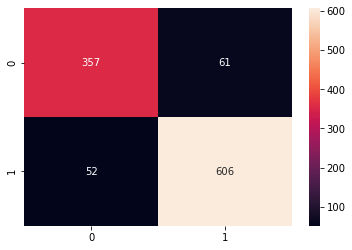

In [54]:
from sklearn.svm import SVC
# C default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C
# shrink default=True Whether to use the shrinking heuristic. S
classifier = SVC()
#0.86/0.91
#parameters = {"kernel":['linear','rbf'], "C":[0.1,10,100,200]}
# parameters = {"kernel":['linear','rbf'], "C":[0.1,0.2,0,5,1,10,100,200],"gamma":[1], "degree":[2,3,4]}

#0.86/0.91 {'C': 100, 'degree': 2, 'kernel': 'rbf'}
# parameters = {"kernel":['linear','rbf'], "C":[0.1,0.2,0,5,1,10,100,200], "degree":[2,3,4]}

#0.86/0.91 'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'
# parameters = {"kernel":['linear','rbf'], "C":[0.1,0.2,0,5,1,10,100,200], "gamma": ['scale'], "degree":[2,3,4]}


# parameters = {"kernel":['linear','rbf'], "C":[0.1,0.2,0,5,1,10,100,200], "gamma":[1,2,10], "degree":[2,3,4]}
parameters = {"kernel":['linear','rbf'], "C":[0,1,0.5,1,100,200,1000], "gamma": ['scale','auto'], "degree":[2,3,4],"shrinking": [True],'random_state': [100]}
# 

# parameters = {"kernel":['linear','rbf','polinomial','poly','sigmoid','precomputed'], "C":[0.1,100],"gamma":[1], "degree":[2,3,4]}
#parameters = {"kernel":['linear','rbf','polinomial','poly','sigmoid'], "C":[0.1,200],"degree":[2,3,4]}
#parameters = {"kernel":['rbf'], "C":[0.1,100],"gamma":[1], "degree":[2,3,4]}
hyperp_search(classifier,parameters)

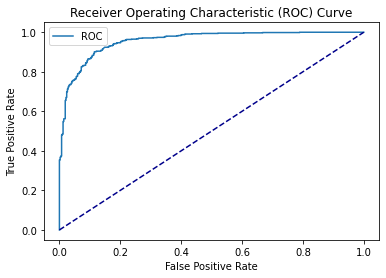

AUC: 0.96


In [56]:
# model = SVC(C=100, kernel='linear',probability=True)
model = SVC(C=100, kernel='rbf',degree=2,gamma='scale',random_state=100,probability=True)
# C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 100, 'shrinking': True}

fpr1,tpr1=roc(model,X_train,y_train,X_test,y_test)

## GradientBoosting

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.5min finished


f1_train: 0.664592 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 3000}
f1_test:  0.8946540880503144
[[373  45]
 [ 89 569]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       418
           1       0.93      0.86      0.89       658

    accuracy                           0.88      1076
   macro avg       0.87      0.88      0.87      1076
weighted avg       0.88      0.88      0.88      1076



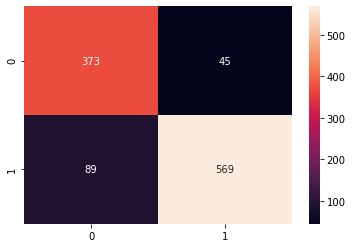

In [55]:
classifier= GradientBoostingClassifier()
# learning_rate default=0.1  Learning rate shrinks the contribution of each tree by learning_rate
# n_estimators default=100 The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# max_depth, default=3  The maximum depth of the individual regression estimators. 

# parameters = {'n_estimators' : [100, 500, 1000, 2000],'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}
# parameters = {'n_estimators' : [1,50,100, 500, 1000, 2000],'max_features' : [1, 0.5, 0.2],'random_state' : [3, 4, 5], 'learning_rate' : [0.01, 0.1, 0.2,0.5,1.0],'random_state': [100]}
# parameters = {'n_estimators' : [1,50,100, 500, 1000, 2000],'max_features' : [1, 0.5, 0.2],'random_state' : [3, 4, 5], 'learning_rate' : [0.01, 0.1, 0.2,0.5,1.0],'random_state': [100]}

# parameters = {'n_estimators' : [100, 500, 1000, 2000],'learning_rate' : [0.01, 0.1, 1,2,5]}
parameters = {'n_estimators' : [100,500,3000,5000],'learning_rate' : [0.1, 1,1.5,2,5],'max_depth':[3,4,5]}

hyperp_search(classifier,parameters)

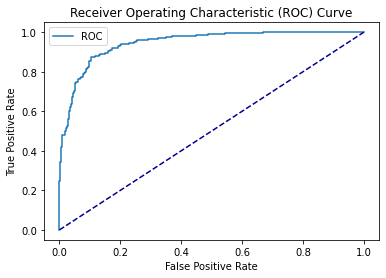

AUC: 0.95


In [57]:
model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=3000,max_depth=3)
fpr2,tpr2=roc(model,X_train,y_train,X_test,y_test)

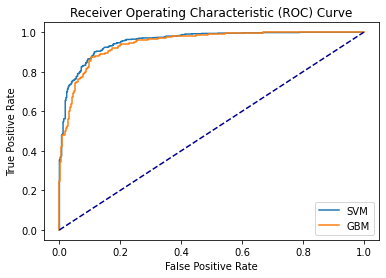

In [58]:
plt.plot(fpr1, tpr1, label= "SVM")
plt.plot(fpr2, tpr2, label= "GBM")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
